# Ch 11 The Dynamics of Derivative Prices

In [1]:
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt

## 4 Major Models of SDEs

### 4.1 Linear Constant Coefficient SDEs (p 266)

$$
    dS_t = \mu dt + \sigma dW_t, \qquad t \in [0, \infty)
$$

, i.e. drift and diffusion coefficients are independent of the information received over time until $t$,

A discrete approximation is given:
$$
    S_k = S_{k - 1} + .01(.001) + .03(\Delta W_k), \qquad k = 1, 2, \ldots, 1000.
$$
with the initial point $S_0 = 100$.

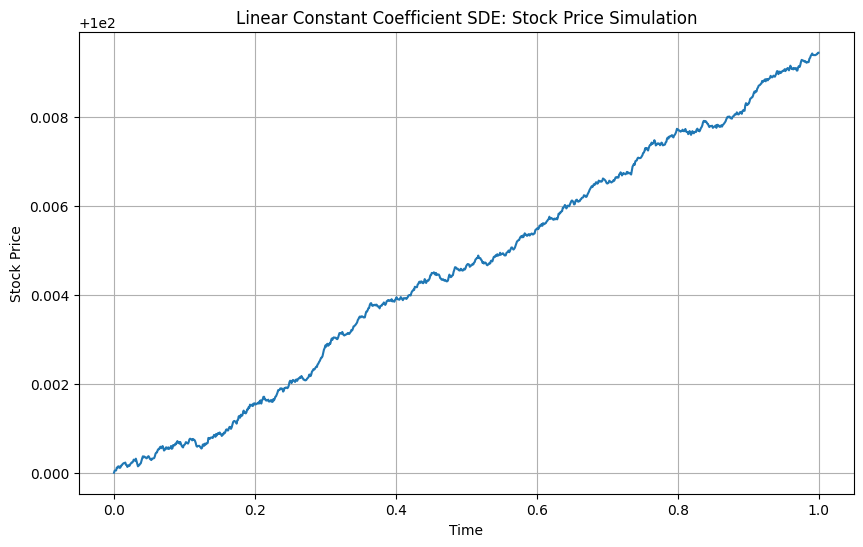

In [4]:
# single simulation & plot of LCC_SDE
def LCC_SDE(S0, mu, sigma, num_steps):
    dt = 1 / num_steps
    time = np.linspace(0, 1, num_steps+1)
    paths = np.zeros(num_steps+1)
    paths[0] = S0

    for k in range(1, num_steps+1):
        dW = np.random.normal(0, np.sqrt(dt))
        drift = mu * dt
        diffusion = sigma * np.sqrt(dt) * dW
        paths[k] = paths[k-1] + drift + diffusion

    return time, paths

# initial conditions
S0 = 100.0  # initial underlying asset price
mu = 0.01
sigma = 0.03
num_steps = 1000  # number of steps in discrete approximation, which is k in the above expression

# simulation
time, paths = LCC_SDE(S0, mu, sigma, num_steps)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(time, paths)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Linear Constant Coefficient SDE: Stock Price Simulation')
plt.grid(True)
plt.show()

This is a single simulation of LCC_SDE.

Let's extend this to multiple simulations, say num_paths = 5, which is the number of simulations, below.

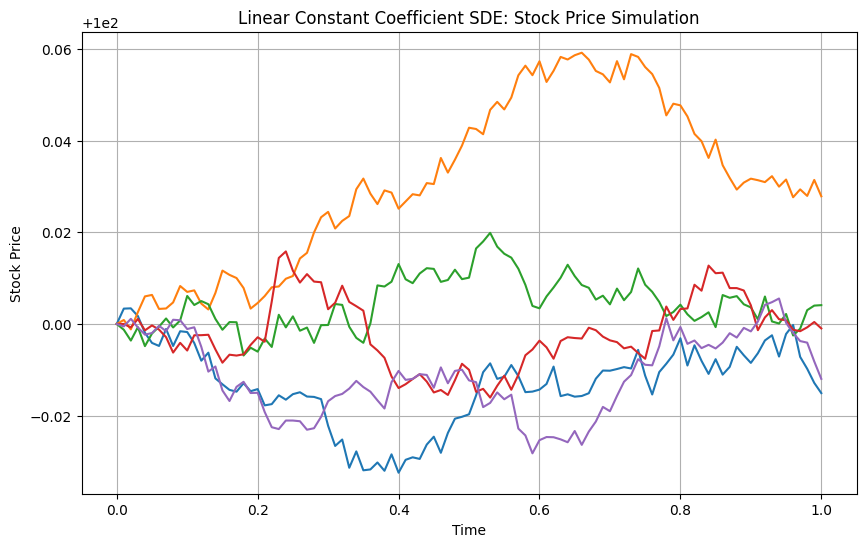

In [5]:
# multiple simulations & plots of LCC_SDE
def multiple_LCC_SDE(S0, mu, sigma, T, dt, num_paths):
    num_steps = int(T / dt)
    time = np.linspace(0, T, num_steps+1)
    paths = np.zeros((num_paths, num_steps+1))
    paths[:, 0] = S0

    for i in range(num_paths):
        for j in range(1, num_steps+1):
            dW = np.random.normal(0, np.sqrt(dt))
            drift = mu * dt
            # diffusion = sigma * np.sqrt(dt) * dW
            diffusion = sigma * dW
            paths[i, j] = paths[i, j-1] + drift + diffusion

    return time, paths

# initial conditions
S0 = 100.0  # initial underlying asset price
mu = 0.01
sigma = 0.03
T = 1.0
dt = 0.01
# num_steps = 1000  # number of steps in discrete approximation, which is k in the above expression
num_paths = 5


# simulation
time, paths = multiple_LCC_SDE(S0, mu, sigma, T, dt, num_paths)

# plotting
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time, paths[i])
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Linear Constant Coefficient SDE: Stock Price Simulation')
plt.grid(True)
plt.show()

### 4.2 Geometric SDEs

The standard SDE used to model underlying asset prices is not the linear coefficient model, but is the `geometric process`. It is the model exploited by Black and Scholes:

$$
    dS_t = \mu S_t dt + \sigma S_t dW_t, \qquad t \in [0, \infty)
$$

Below we implement the following finite difference approximation:

$$
    dS_t = .15 S_t dt + .30 S_t dW_t
$$
with the initial point $S_0 = 100$.

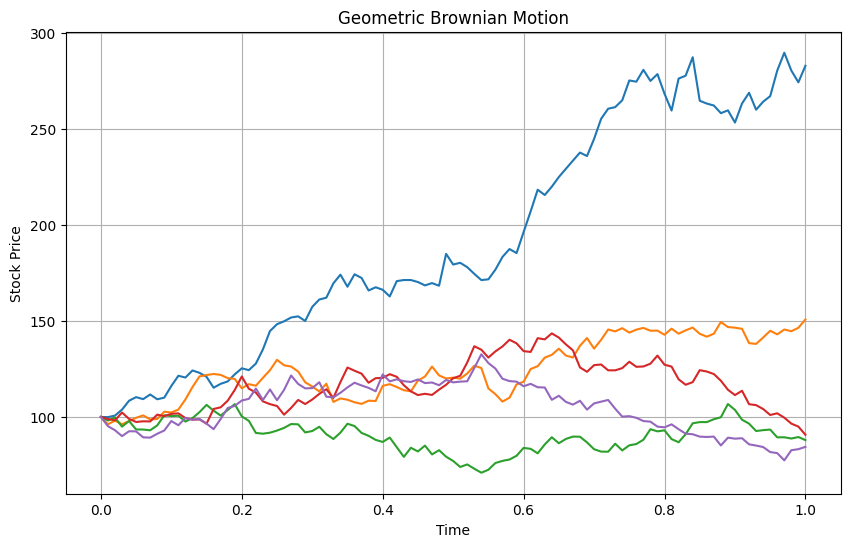

In [6]:
def Geometric_Brownian_Motion(S0, mu, sigma, T, dt, num_paths):
    num_steps = int(T / dt)  # number of steps in discrete approximation = num of time intervals(in the x(time)-axis of plot)
    time = np.linspace(0, T, num_steps+1)
    paths = np.zeros((num_paths, num_steps+1 ))  # S(t) array
    paths[:, 0] = S0  # initial stock price (at t=0)

    for i in range(num_paths):
        for j in range(1, num_steps+1):
            dW = np.random.normal(0, np.sqrt(dt))
            drift = mu * paths[i, j-1] * dt
            diffusion = sigma * paths[i, j-1] * dW
            paths[i, j] = paths[i, j-1] + drift + diffusion
    
    return time, paths

# initial conditions
S0 = 100.0  # initial stock price
mu = 0.15  # expected return
sigma = 0.30  # volatility
T = 1.0  # time horizon (1 year)
dt = 0.01  # time interval in discrete approximation
num_paths = 5  # number of simulations

# stocks simulation
time, paths = Geometric_Brownian_Motion(S0, mu, sigma, T, dt, num_paths)

# plot the geometric process
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time, paths[i])

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Geometric Brownian Motion')
plt.grid(True)
plt.show()

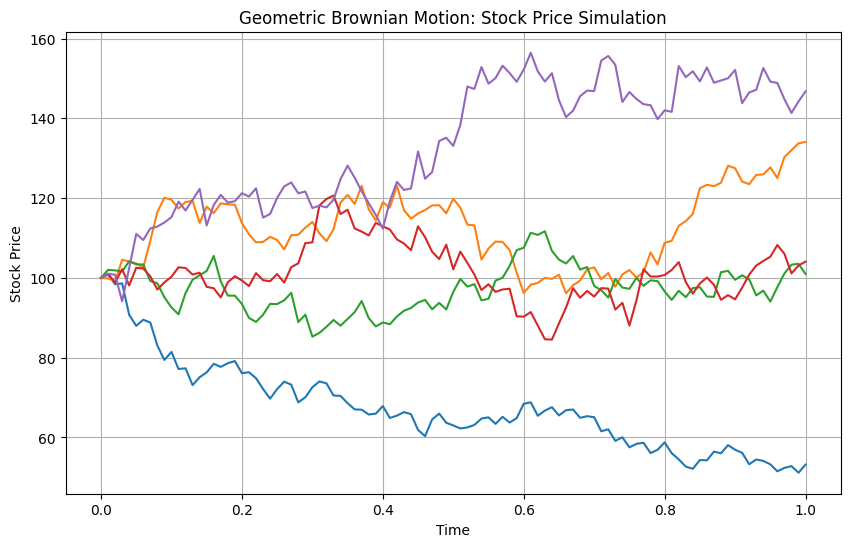

In [7]:
'''
comparing to the previous Geometric_Brownian_Motion,
the only differences are the epsilon term in the diffusion term and
np.sqrt(dt) instead of just dW
'''

def geometric_brownian_motion(S0, mu, sigma, T, dt, num_paths):
    num_steps = int(T / dt)  # number of steps in discrete approximation = num of time intervals(in the x(time)-axis of plot)
    time = np.linspace(0, T, num_steps+1)
    paths = np.zeros((num_paths, num_steps+1))
    paths[:, 0] = S0  # initial stock price (at t=0)

    for i in range(num_paths):
        for j in range(1, num_steps+1):
            epsilon = np.random.normal(0, 1)
            drift = mu * paths[i, j-1] * dt
            diffusion = sigma * paths[i, j-1] * epsilon  * np.sqrt(dt)
            paths[i, j] = paths[i, j-1] + drift + diffusion

    return time, paths

# initial conditions
S0 = 100  # initial stock price
mu = 0.15  # expected return
sigma = 0.30  # volatility
T = 1  # time horizon (1 yr)
dt = 0.01  # time interval
num_paths = 5  # number of simulations

# stocks simulation
time, paths = geometric_brownian_motion(S0, mu, sigma, T, dt, num_paths)

# plot of geometric process
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time, paths[i])

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Geometric Brownian Motion: Stock Price Simulation')
plt.grid(True)
plt.show()

### 4.3. Square Root Process

$$
    dS_t = \mu S_t dt + \sigma \sqrt{S_t} dW_t \qquad t \in [0, \infty)
$$

This makes the "variance" of the error term proportional to $S_t$.

If the asset price volatility does not increase "too much" when $S_t$ increases, this model may be more appropriate. (if $S_t > 1$)

For approximation, we employ
$$
    dS_t = .15 S_t dt + .30 \sqrt{S_t} dW_t \qquad t \in [0, \infty)
$$

, which is the same as in the approximation of 4.2. Geometric Process, except the diffusion is proportional to $\sqrt{S_t}$ instead of $S_t$.


Clearly, the fluctuations in the plot below are more subdued than the ones in `4.2. Geometric Process`, yet the sample paths have "similar" trends.

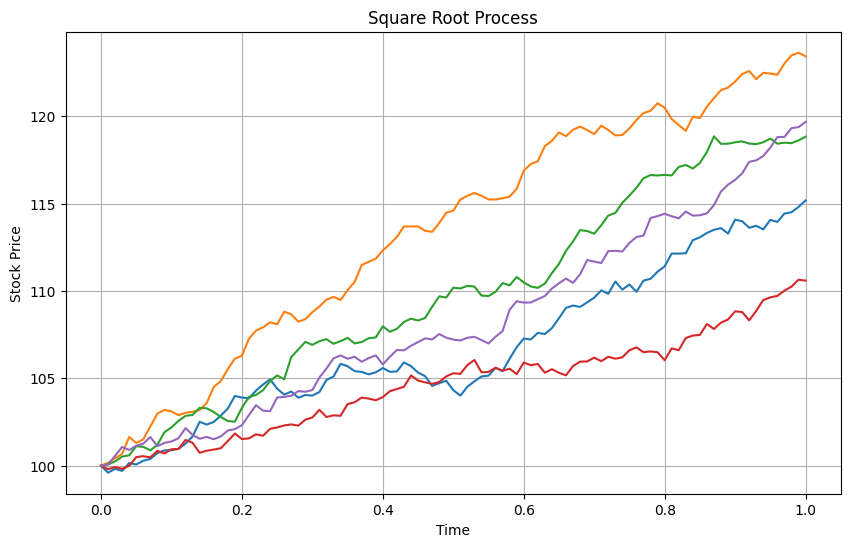

In [15]:
# only changed diffusion term here
def square_root_process(S0, mu, sigma, T, dt, num_paths):
    num_steps = int(T / dt)
    time = np.linspace(0, T, num_steps+1)
    paths = np.zeros((num_paths, num_steps+1 ))  # S(t)
    paths[:, 0] = S0  # initial stock price (at t=0)

    for i in range(num_paths):
        for j in range(1, num_steps+1):
            dW = np.random.normal(0, np.sqrt(dt))
            drift = mu * paths[i, j-1] * dt
            diffusion = sigma * np.sqrt(paths[i, j-1]) * dW
            paths[i, j] = paths[i, j-1] + drift + diffusion
    
    return time, paths

# initial conditions
S0 = 100.0  # initial stock price
mu = 0.15  # expected return
sigma = 0.30  # volatility
T = 1.0  # time horizon (1 year)
dt = 0.01  # time interval in discrete approximation
num_paths = 5  # number of simulations

# stocks simulation
time, paths = square_root_process(S0, mu, sigma, T, dt, num_paths)

# plot the geometric process
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time, paths[i])

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Square Root Process')
plt.grid(True)
plt.show()

### 4.3. Mean Reverting Process

An SDE that has been found useful in modeling asset prices is the *`mean reverting model`*(often used to model interest rate dynamics):

$$
    dS_t = \lambda (\mu - S_t) dt + \sigma S_t dW_t
$$

The mean reverting process has a trend, but the deviations around this trend are not completely random.

Asset prices my exhibit some predictable periodicities. This usually makes the model inconsistent with market efficiency.


For discrete approximation, we implement the following SDE:
$$
    \Delta S_k = .5 (.05 - S_{k-1}).001 + .8 S_{k-1} \Delta W_k, \qquad, k=1, 2, \ldots, 1000
$$
(I think the term $S_{k-1}$ is `ommited` (99% sure that this is a typo) in p 270, so I've added in this note.)

This implies a long-run mean of $5\%$ and a volatility of $80\%$ during a time interval of length $1$. The $\lambda$ implies an adjustment of $50\%$.
We selected the length of finite subintervals as $h = .001$ and according to this, during a time interval of length $1$, we will observe $1000 \quad S_t$'s.


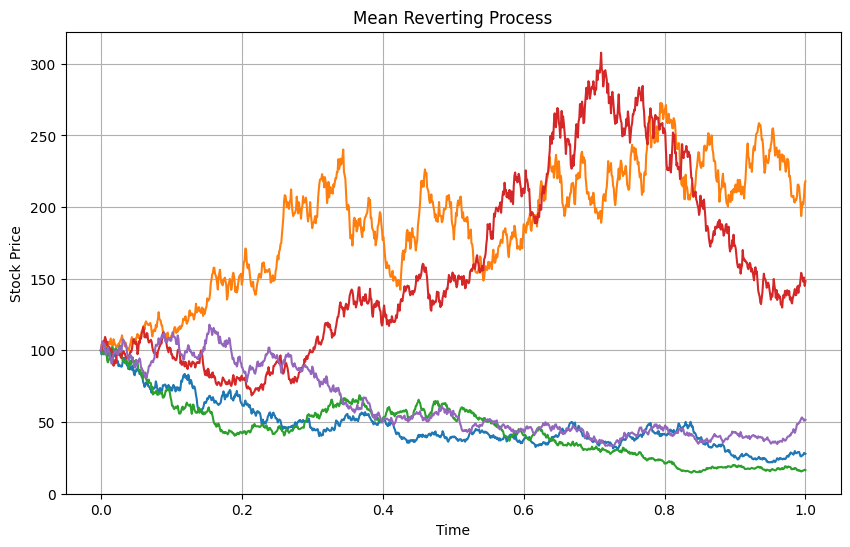

In [27]:
# only changed diffusion term here
def mean_reverting_process(S0, mu, sigma, T, dt, num_paths, lmbda):
    num_steps = int(T / dt)
    time = np.linspace(0, T, num_steps+1)
    paths = np.zeros((num_paths, num_steps+1 ))  # S(t)
    paths[:, 0] = S0  # initial stock price (at t=0)

    for i in range(num_paths):
        for j in range(1, num_steps+1):
            dW = np.random.normal(0, np.sqrt(dt))
            drift = lmbda *  (mu - paths[i, j-1]) * dt
            diffusion = sigma * paths[i, j-1] * dW
            paths[i, j] = paths[i, j-1] + drift + diffusion
    
    return time, paths

# initial conditions - see p 270.
S0 = 100.0  # initial stock price
mu = 0.05  # expected return
sigma = 0.8  # volatility
T = 1.0  # time horizon (1 year)
dt = 0.001  # time interval in discrete approximation
num_paths = 5  # number of simulations
lmbda = 0.5

# stocks simulation
time, paths = mean_reverting_process(S0, mu, sigma, T, dt, num_paths, lmbda)

# plot the geometric process
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time, paths[i])

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Mean Reverting Process')
plt.grid(True)
plt.show()

A related SDE is the one where the drift is of the mean reverting type, but the diffusion is dependent on the square root of $S_t$:

$$
    dS_t = \lambda (\mu - S_t) dt + \sigma \sqrt{S_t} dW_t
$$

Indeed, this is Cox-Ingersoll-Ross's interest rate model and it forms the stochastic volatility component of Heston's asset price model. 

For discrete approximation, we implement the following SDE:
$$
    \Delta S_k = .5 (.05 - S_{k-1}).001 + .8 \sqrt{S_{k-1}} \Delta W_k, \qquad, k=1, 2, \ldots, 1000
$$

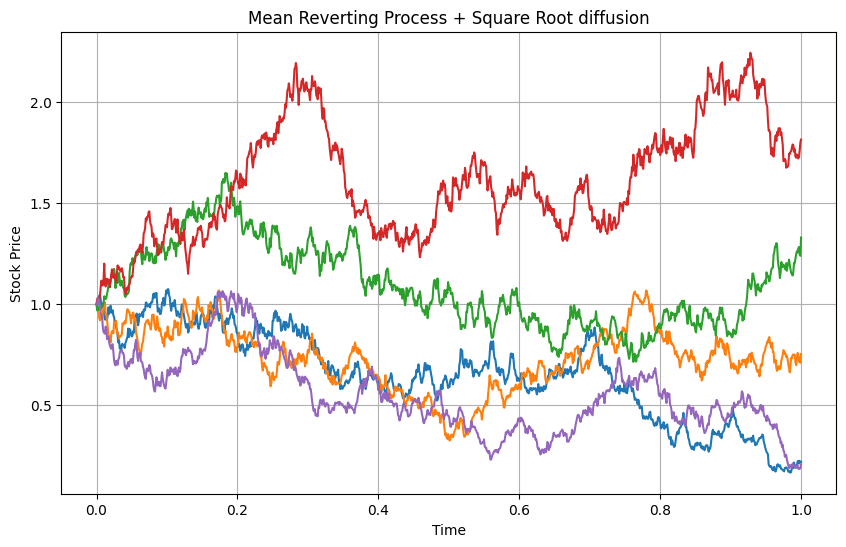

In [71]:
def mean_reverting_process_sqrt(S0, mu, sigma, T, dt, num_paths, lmbda):
    num_steps = int(T / dt)
    time = np.linspace(0, T, num_steps+1)
    paths = np.zeros((num_paths, num_steps+1 ))  # S(t)
    paths[:, 0] = S0  # initial stock price (at t=0)

    for i in range(num_paths):
        for j in range(1, num_steps+1):
            dW = np.random.normal(0, np.sqrt(dt))
            drift = lmbda *  (mu - paths[i, j-1]) * dt
            diffusion = sigma * np.sqrt(paths[i, j-1]) * dW  # only diffusion term is changed this time
            paths[i, j] = paths[i, j-1] + drift + diffusion
    
    return time, paths

S0 = 1.0  # initial stock price
mu = 0.05  # expected return
sigma = 0.8  # volatility
T = 1.0  # time horizon (1 year)
dt = 0.001  # time interval in discrete approximation
num_paths = 5  # number of simulations
lmbda = 0.5

# stocks simulation
time, paths = mean_reverting_process_sqrt(S0, mu, sigma, T, dt, num_paths, lmbda)

# plot the geometric process
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time, paths[i])

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Mean Reverting Process + Square Root diffusion')
plt.grid(True)
plt.show()

### 4.3. Ornstein-Uhlenbeck Process
$$
    dS_t = -\mu S_t dt + \sigma dW_t
$$
where $\mu > 0$

This is a special case of "mean reverting SDE". This model can be used to represent asset prices that flucutate around zero.

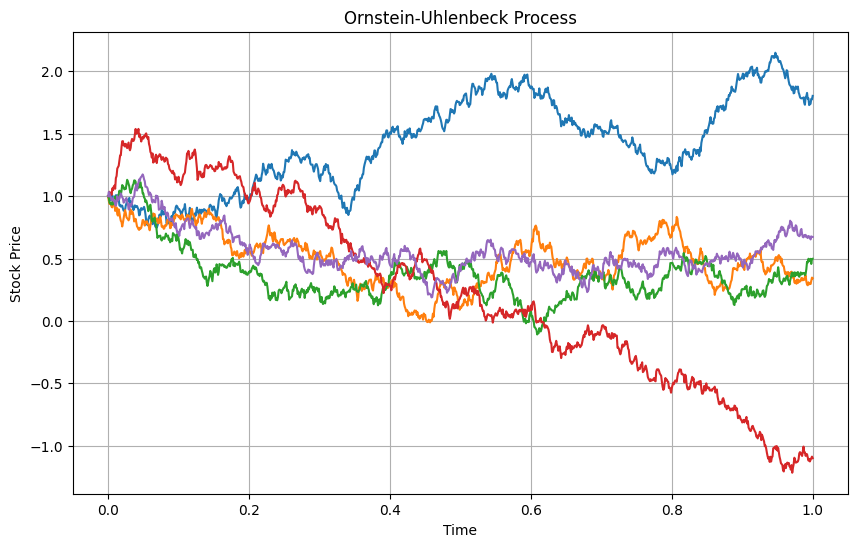

In [70]:
# here lmbda=(new) mu and (old) mu = 0 (here, old mu represents the mu used in the mean reverting SDE)
def Ornstein_Uhlenbeck_process(S0, mu, sigma, T, dt, num_paths):
    num_steps = int(T / dt)
    time = np.linspace(0, T, num_steps+1)
    paths = np.zeros((num_paths, num_steps+1 ))  # S(t)
    paths[:, 0] = S0  # initial stock price (at t=0)

    for i in range(num_paths):
        for j in range(1, num_steps+1):
            dW = np.random.normal(0, np.sqrt(dt))
            drift = -1 * mu * paths[i, j-1] * dt
            diffusion = sigma * dW
            paths[i, j] = paths[i, j-1] + drift + diffusion
    
    return time, paths

S0 = 1.0  # initial stock price
mu = 0.05  # expected return
sigma = 0.8  # volatility
T = 1.0  # time horizon (1 year)
dt = 0.001  # time interval in discrete approximation
num_paths = 5  # number of simulations

# stocks simulation
time, paths = Ornstein_Uhlenbeck_process(S0, mu, sigma, T, dt, num_paths)

# plot the geometric process
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time, paths[i])

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Ornstein-Uhlenbeck Process')
plt.grid(True)
plt.show()

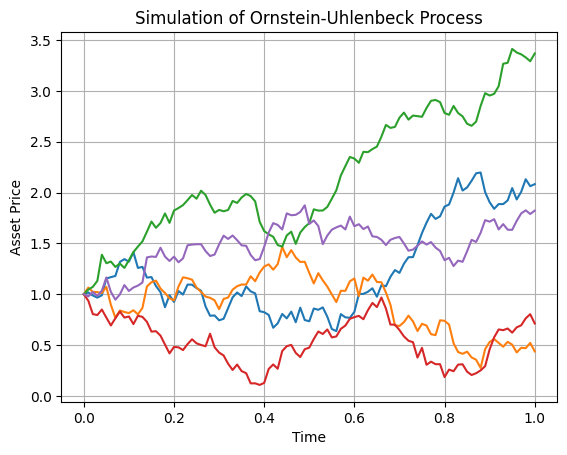

In [82]:
# instead one may try chaning dW into an arrray

# Parameters
S0 = 1.0  # Initial asset price
mu = 0.05
sigma = 0.8  # try sigma = 0.2 instead
T = 1.0  # Time horizon
dt = 0.01  # Time step
num_paths = 5  # Number of simulations

# Number of time steps
k = int(T / dt)

# Generate time vector
t = np.linspace(0, T, k+1)

# Generate empty array to store asset prices for each simulation
S = np.zeros((num_paths, k+1))
S[:, 0] = S0

# Generate random numbers from a standard normal distribution
dW = np.random.normal(0, np.sqrt(dt), (num_paths, k))

# Perform the simulations
for i in range(num_paths):
    for j in range(1, k+1):
        S[i, j] = S[i, j-1] - mu * S[i, j-1] * dt + sigma * dW[i, j-1]

# Plot the simulations
for i in range(num_paths):
    plt.plot(t, S[i])

plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.title('Simulation of Ornstein-Uhlenbeck Process')
plt.grid(True)
plt.show()

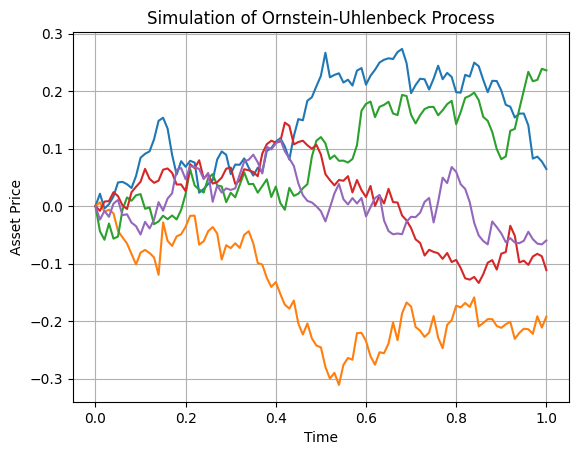

In [62]:
def Ornstein_Uhlenbeck_Process():
    k = int(T / dt)  # Number of time steps    
    t = np.linspace(0, T, k+1)  # Generate time vector

    # Generate empty arrays to store asset prices and initialize the first value
    S = np.zeros(k+1)
    S[0] = S0

    # Generate random numbers from a standard normal distribution
    dW = np.random.normal(0, np.sqrt(dt), k)

    # Perform the simulation
    for i in range(1, k+1):
        S[i] = S[i-1] - mu * S[i-1] * dt + sigma * dW[i-1]

    return t, S

# Parameters
S0 = 0.0  # Initial asset price, try 1.0
mu = 0.5  # try 0.05
sigma = 0.2  # try 0.8
T = 1.0  # Time horizon
dt = 0.01  # Time step
num_simulations = 5

# Perform multiple simulations and plot the results
for _ in range(num_simulations):
    t, S = Ornstein_Uhlenbeck_Process()
    plt.plot(t, S)

plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.title('Simulation of Ornstein-Uhlenbeck Process')
plt.grid(True)
plt.show()

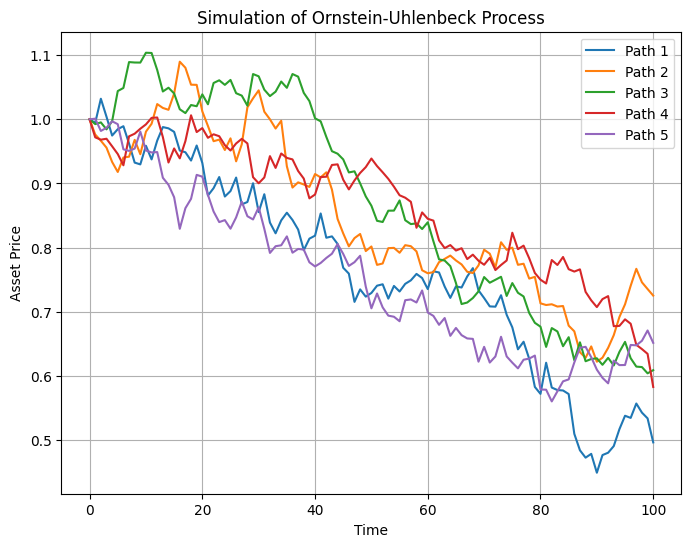

In [66]:
def Ornstein_Uhlenbeck_Process(S0, mu, sigma, T, dt, num_paths):
    N = int(T / dt)  # Number of time steps
    t = np.linspace(0, T, N+1)  # Time vector

    paths = np.zeros((num_paths, N+1))  # Empty array to store paths
    paths[:, 0] = S0  # Initial values

    for i in range(num_paths):
        dW = np.random.normal(0, np.sqrt(dt), N)  # Generate random numbers
        for j in range(1, N+1):
            paths[i, j] = paths[i, j-1] - mu * paths[i, j-1] * dt + sigma * dW[j-1]

    return paths


# Parameters
S0 = 1  # Initial asset price
mu = 0.5  # Mean reversion speed
sigma = 0.2  # Volatility
T = 1  # Time horizon
dt = 0.01  # Time step
num_paths = 5  # Number of paths to simulate

# Simulate Ornstein-Uhlenbeck Process
paths = Ornstein_Uhlenbeck_Process(S0, mu, sigma, T, dt, num_paths)

# Plot the simulated paths
plt.figure(figsize=(8, 6))
for i in range(num_paths):
    plt.plot(paths[i], label=f'Path {i+1}')
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.title('Simulation of Ornstein-Uhlenbeck Process')
plt.legend()
plt.grid(True)
plt.show()


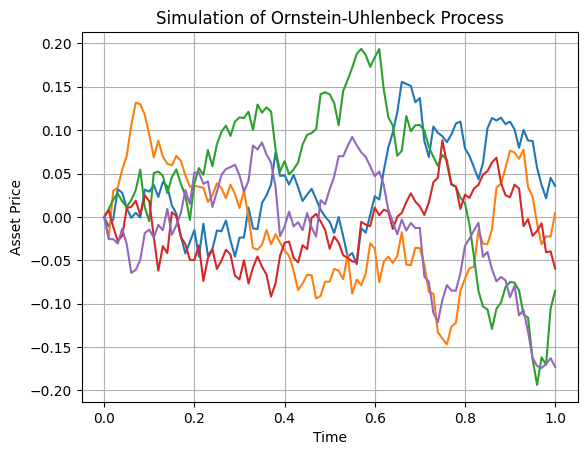

In [87]:
# Parameters
mu = 0.5  # Mean reversion rate (must be positive)
sigma = 0.2  # Volatility
S0 = 0.0  # Initial asset price
T = 1.0  # Time horizon
dt = 0.01  # Time step
num_simulations = 5  # Number of simulations to plot

# Number of time steps
N = int(T / dt)
# Generate time vector
t = np.linspace(0, T, N+1)

# Generate empty array to store asset prices for each simulation
S = np.zeros((num_simulations, N+1))
S[:, 0] = S0

# Generate random numbers from a standard normal distribution
dW = np.random.normal(0, np.sqrt(dt), (num_simulations, N))

# Perform the simulation
for i in range(num_simulations):
    for j in range(1, N+1):
        S[i, j] = S[i, j-1] - mu * S[i, j-1] * dt + sigma * dW[i, j-1]

# Plot the simulations
for i in range(num_simulations):
    plt.plot(t, S[i, :])

plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.title('Simulation of Ornstein-Uhlenbeck Process')
plt.grid(True)
plt.show()